# Paket networkx

Paket **Networkx** je Python biblioteka koja podržava rad sa grafovima. Korišćenjem njenih funkcija moguće je kreirati čvorove grafa i grane između njih, pridruživati atribute elementima grafa, prikazivati grafove, kao i koristiti mnogobrojne algoritame za rad sa grafovima. Jedna od funkcija koja stoji na raspolaganju je i `pagerank` koja nudi mogućnost sortiranja čvorova grafa na osnovu ulaznih grana.

Za dalji rad potrebno je instalirati paket `networkx` komandom `conda install networkx`.

In [1]:
import networkx as nx

In [2]:
import numpy as np
from matplotlib import pyplot as plt

### Neusmereni grafovi

Prvo ćemo upoznati funkcije za rad sa neusmerenim grafovima.

Neusmereni graf se kreira funkcijom `Graph`. Pojedinačni čvorovi se mogu dodati funkcijom `add_node`, a više čvorova odjednom se može dodati funkcijom `add_nodes_from`. Grane između čvorova se dodaju funkcijom `add_edge` sa početnim i kranjim čvorom kao argumentima. Ukoliko prilikom dodavanja grana korišćeni čvorovi ne postoje, biće dodati grafu.

Sledeći blok koda konstruiše jednostavan graf.

In [3]:
G = nx.Graph()
G.add_node('a')
G.add_node('b')
G.add_nodes_from(['c', 'd', 'e'])
G.add_edge('c', 'd')
G.add_edge('a', 'd')
G.add_edge('e', 'f')
G.add_edge('b', 'b')

Svi čvorovi grafa se mogu dobiti pozivom funkcije `nodes`, a sve grane grafa pozivom funkcije `edges`.

In [4]:
G.nodes()

NodeView(('a', 'b', 'c', 'd', 'e', 'f'))

In [5]:
G.edges()

EdgeView([('a', 'd'), ('b', 'b'), ('c', 'd'), ('e', 'f')])

Pojedinačnim čvorovima grafa možemo pristupiti preko `nodes` svojstva, a pojedinačnim granama grafa preko svojstva `edges`. Za pristup možemo koristiti imena čvorova.

In [6]:
G.nodes['a']

{}

In [7]:
G.edges['a', 'd']

{}

Sumarne informacije o samom grafu se prikazuju funkcijom `info`. Pojedinačne prikazane informacije se mogu dobiti funkcijama `number_of_nodes` i `number_od_edges`. 

In [8]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 4
Average degree:   1.3333


Informacije o stepenima čvorova grafa se mogu dobiti pozivom funkcije `degree`. Za neusmerene grafove to je broj čvorova-suseda.

In [9]:
G.degree()

DegreeView({'a': 1, 'b': 2, 'c': 1, 'd': 2, 'e': 1, 'f': 1})

Informacije o susedima čvora se mogu dobiti pomoću funkcije  `neighbors`.

In [10]:
for n in G.neighbors('d'):
    print(n)

c
a


Funkcija `remove_node` se koristi za brisanje čvora i svih njegovih grana.

In [11]:
G.remove_node('a')

Funkcija `clear` se može iskoristiti za brisanje svih čvorova i grana grafa.

In [12]:
G.clear()

Grane grafa mogu imati i svoje težine. Težinama se mogu predstaviti jačine povezanosti između čvorova. Dalje ćemo kreirati jedan težinski graf. Za zadavanje težina možemo iskoristiti argument `weight` funkcije `add_edge` ili funkciju `add_weighted_edges_from`.

In [13]:
G.add_edge('a', 'b', weight = 0.6)
G.add_edge('a', 'c', weight = 0.2)
G.add_edge('c', 'd', weight = 0.1)
G.add_edge('c', 'e', weight = 0.7)
G.add_edge('c', 'f', weight = 0.9)
G.add_edge('a', 'd', weight = 0.3)
G.add_weighted_edges_from([('b', 'f', 0.2)])

Popis svih grana grafa i njima pridruženih težina se može dobiti pozivom funkcije `edges`. Prilikom poziva potrebno je postaviti argument `data` kojima se dozvoljava čitanje svih svojstava grana.

In [14]:
G.edges(data=True)

EdgeDataView([('a', 'b', {'weight': 0.6}), ('a', 'c', {'weight': 0.2}), ('a', 'd', {'weight': 0.3}), ('b', 'f', {'weight': 0.2}), ('c', 'd', {'weight': 0.1}), ('c', 'e', {'weight': 0.7}), ('c', 'f', {'weight': 0.9})])

Osim težina, granama grafa se mogu pridruživati i drugi atributi. Pridruživanje atributa granama grafa se vrši navođenjem odgovarajućih atributa i njihovih vrednosti prilikom dodavanja grana. Ove vrednosti se mogu dinamički menjati. 

In [15]:
G.add_edge('a', 'f', weight=0.3, description='long edge')
G.edges['c','e']['description'] = 'short edge'
G['a']['c']['color'] = 'red'

Atributi se mogu pridruživati i čvorovima grafa, kao i samom grafu. Sledeći primeri ilustruju sintaksu koja prati rad sa atributima na nivo.

In [16]:
G.graph['name'] = 'demo graph'
G.nodes['a']['description'] = 'first node'
G.nodes['f']['description'] = 'last node'

Atributi vezani za konkretan čvor se mogu očitati pomoću svojstva `nodes` korišćenjem imena čvora, dok se atributi za sve čvorove mogu dobiti korišćenjem njegove funkcije `data`.

In [17]:
G.nodes['a']

{'description': 'first node'}

In [18]:
G.nodes.data()

NodeDataView({'a': {'description': 'first node'}, 'b': {}, 'c': {}, 'd': {}, 'e': {}, 'f': {'description': 'last node'}})

Atributi vezani za grane se, takođe, mogu dobiti korišćenjem funkcije `data` nad svojstvom `edges`.

In [19]:
G.edges.data()

EdgeDataView([('a', 'b', {'weight': 0.6}), ('a', 'c', {'weight': 0.2, 'color': 'red'}), ('a', 'd', {'weight': 0.3}), ('a', 'f', {'weight': 0.3, 'description': 'long edge'}), ('b', 'f', {'weight': 0.2}), ('c', 'd', {'weight': 0.1}), ('c', 'e', {'weight': 0.7, 'description': 'short edge'}), ('c', 'f', {'weight': 0.9})])

Funkcija `degree` za težinske grafove kao rezultat daje sumu svih težina grana koje povezuju čvor sa susedima. Njenim argumentom `weight` se navodi koji se atribut uzima kao težina grane. 

In [20]:
G.degree(weight='weight')

DegreeView({'a': 1.4000000000000001, 'b': 0.8, 'c': 1.9, 'd': 0.4, 'e': 0.7, 'f': 1.4000000000000001})

Kreirani graf se može sačuvati funkcijom `write_gml`. GML (skraćeno od Graph Modeling Language) je tekstualni format koji se specifično koristi za čuvanje informacija o grafovima.

In [21]:
nx.write_gml(G, 'demo_graph.gml')

In [22]:
!cat 'demo_graph.gml'

graph [
  name "demo graph"
  node [
    id 0
    label "a"
    description "first node"
  ]
  node [
    id 1
    label "b"
  ]
  node [
    id 2
    label "c"
  ]
  node [
    id 3
    label "d"
  ]
  node [
    id 4
    label "e"
  ]
  node [
    id 5
    label "f"
    description "last node"
  ]
  edge [
    source 0
    target 1
    weight 0.6
  ]
  edge [
    source 0
    target 2
    weight 0.2
    color "red"
  ]
  edge [
    source 0
    target 3
    weight 0.3
  ]
  edge [
    source 0
    target 5
    weight 0.3
    description "long edge"
  ]
  edge [
    source 1
    target 5
    weight 0.2
  ]
  edge [
    source 2
    target 3
    weight 0.1
  ]
  edge [
    source 2
    target 4
    weight 0.7
    description "short edge"
  ]
  edge [
    source 2
    target 5
    weight 0.9
  ]
]


Funkcija `read_gml` se može upotrebiti za kreiranje grafa na osnovu fajl reprezentacije.

In [23]:
# G_copy = nx.read_gml('demo_graph.gml')

Prethodni graf prikazaćemo korišćenjem `matplotlib.pyplot` biblioteke na sledeći način:

* čvorove ćemo obojiti u plavo i postaviti im veličinu na 1000;
* oznake čvorova ćemo obojiti u žuto i prikazati *Arial* fontom veličine 20px;
* grane čija je težina veća od 0.5 obojićemo ljubičastom bojom i postaviti im debljinu na 3;
* grane čija je težina manja ili jednaka 0.5 obojićemo, takođe, ljubičastom bojom, ali ćemo im postaviti debljinu na 2 i iscrtati ih isprekidanom linijom;
* prilikom iscrtavanja grafa nećemo iscrtati ose.

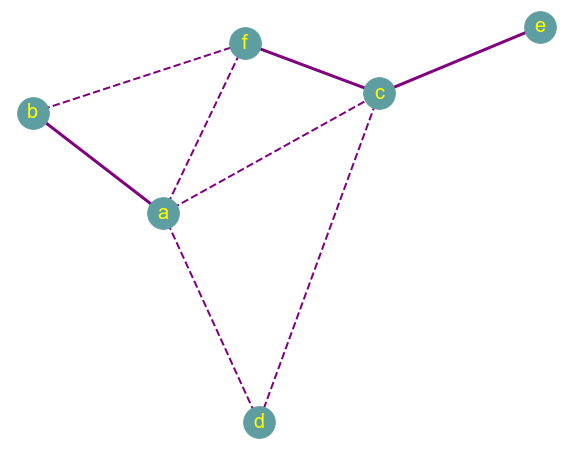

In [24]:
plt.figure(figsize=(10, 8))
# Najpre odredjujemo koje su grane jace, a koje slabije tezine
strong_edges = []
weak_edges = []

for (s, d, data) in G.edges(data=True):
    if data['weight'] >= 0.5:
        strong_edges.append((s, d))
    else:
        weak_edges.append((s, d))

        
# spring layout je jedan nacin pozicioniranje grafa koji cemo koristiti
pos = nx.spring_layout(G)

# Iscrtavamo cvorove
nx.draw_networkx_nodes(G, pos, node_color='cadetblue', node_size=1000)

# Iscrtavamo oznake cvorova
nx.draw_networkx_labels(G, pos, font_color='yellow', font_size=20, font_family='arial')

# Iscrtavamo vece grane
nx.draw_networkx_edges(G, pos, edgelist=strong_edges, width=3, edge_color='purple')

# Iscrtavamo manje grane
nx.draw_networkx_edges(G, pos, edgelist=weak_edges, width=2, edge_color='purple', style='dashed')

# Iskljucujemo ose
plt.axis('off')

# I prikazujemo graf
plt.show()

Grafik se može iscrtati i korišćenjem funkcija `draw`, `draw_random` ili `draw_circular` paketa `networkx`.

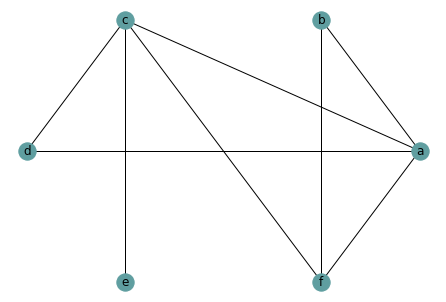

In [26]:
nx.draw_circular(G, with_labels=True, node_color='cadetblue')

### Usmereni grafovi

Usmereni graf se može kreirati funkcijom `DiGraph`. Za dodavanje čvorova, grana i njihovih atributa koriste se iste funkcije kao i u radu sa neusmerenim grafovima.

In [27]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([('a', 'b', 0.6), ('c', 'a', 0.75), ('a', 'd', 0.5), ('c', 'd', 0.2), ('a', 'e', 0.8)])

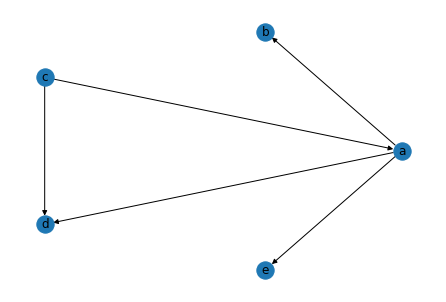

In [28]:
nx.draw_circular(DG, with_labels = True)

Za ispitivanje grana grafa, pored funkcije `edges` mogu se koristiti i funkcije `out_edges` i `_edges`. Prva izdvaja listu izlaznih grana, a druga ulaznih. 

In [29]:
DG.edges()

OutEdgeView([('a', 'b'), ('a', 'd'), ('a', 'e'), ('c', 'a'), ('c', 'd')])

In [30]:
DG.out_edges()

OutEdgeView([('a', 'b'), ('a', 'd'), ('a', 'e'), ('c', 'a'), ('c', 'd')])

In [31]:
DG.in_edges()

InEdgeView([('c', 'a'), ('a', 'b'), ('a', 'd'), ('c', 'd'), ('a', 'e')])

Izlazni stepen čvora je broj izlaznih grana čvora. Slično, ulazni stepen čvora je broj ulaznih grana čvora. U slučaju težinskih grafova, može se dobiti i zbir njihovih težina.

Sledeći primeri prate čvor `a` i uvode funkcije `out_degree`, `in_degree` i `degree`. Njima se, redom, računaj izlazni i ulazni stepen, kao i ukupan stepen čvora.

In [32]:
DG.out_degree('a')

3

In [33]:
DG.out_degree('a', weight='weight')

1.9000000000000001

In [34]:
DG.in_degree('a')

1

In [35]:
DG.in_degree('a', weight='weight')

0.75

In [36]:
DG.degree('a')

4

In [37]:
DG.degree('a', weight='weight')

2.6500000000000004

Informacije o susednim čvorovim posmatranog čvora se mogu dobiti funkcijama `successors` i `predecessors`. Funkcija `successors` pronalazi čvorove ka kojima postoji izlazna grana, dok funkcija `predecessors` pronalazi čvorove čije grane vode do posmatranog čvora.

In [38]:
for neighbour in DG.successors('a'):
    print(neighbour)

b
d
e


In [39]:
for neighbour in DG.predecessors('a'):
    print(neighbour)

c


I usmereni i neusmereni graf se mogu kreirati na osnovu matrice povezanosti pomoću funkcije `from_numpy_matrix` paketa `networkx`. Tip grafa se navodi parametrom `create_using`. 

Sledeći blok koda formira usmereni graf.

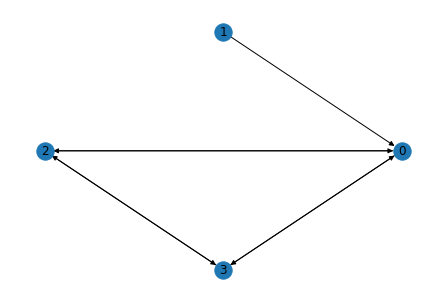

In [40]:
link_matrix = np.matrix([
    [0, 0, 1, 0.5], 
    [1.0 / 3, 0, 0, 0],
    [1.0 / 3, 0, 0.5, 0.5], 
    [1.0 / 3, 0, 0.5, 0]
])

G = nx.from_numpy_matrix(link_matrix, create_using=nx.DiGraph)
nx.draw_circular(G, with_labels = True)

Kao što smo napomenuli, paket `networkx` raspolaže i funkcijom `pangerank` koja vrši sortiranje čvorova grafa. 

Sledeći primer ilustruje njeno korišćenje na nivou grafa koji sadrži informacije o prostorijama jedne poslovne zgrade.

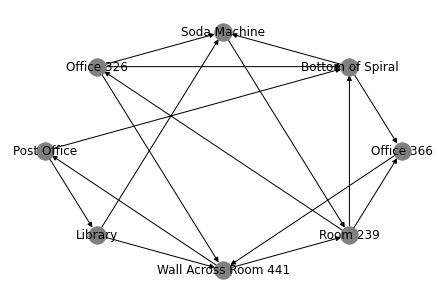

In [41]:
G = nx.DiGraph()
locations = [
    "Office 366", "Bottom of Spiral", "Soda Machine", "Office 326",
    "Post Office", "Library", "Wall Across Room 441", "Room 239"
]
G.add_nodes_from(locations)
G.add_edges_from([('Office 366', 'Wall Across Room 441'),
                  ('Bottom of Spiral', 'Office 366'),
                  ('Bottom of Spiral', 'Soda Machine'),
                  ('Soda Machine', 'Room 239'), ('Office 326', 'Soda Machine'),
                  ('Office 326', 'Bottom of Spiral'),
                  ('Office 326', 'Wall Across Room 441'),
                  ('Post Office', 'Bottom of Spiral'),
                  ('Post Office', 'Library'), ('Library', 'Soda Machine'),
                  ('Library', 'Wall Across Room 441'),
                  ('Wall Across Room 441', 'Post Office'),
                  ('Wall Across Room 441', 'Room 239'),
                  ('Room 239', 'Office 366'), ('Room 239', 'Bottom of Spiral'),
                  ('Room 239', 'Office 326')])

nx.draw_circular(G, node_color='gray', with_labels=True)

plt.show()

Za svaku od lokacija u zgradi možemo ispisati broj izlaznih i broj ulaznih čvorova.

In [42]:
for name in locations:
    print('{0}: out - {1}, in - {2}'.format(name, len(G.out_edges(name)), len(G.in_edges(name))))

Office 366: out - 1, in - 2
Bottom of Spiral: out - 2, in - 3
Soda Machine: out - 1, in - 3
Office 326: out - 3, in - 1
Post Office: out - 2, in - 1
Library: out - 2, in - 1
Wall Across Room 441: out - 2, in - 3
Room 239: out - 3, in - 2


Funkcija `pagerank` očekuje kao ulaz usmereni graf. Ukoliko graf nije usmeren, podrazumevano se transformiše u usmereni graf sa granama između čvorova u oba smera. Na raspolaganju su i parametri `alpha` i `dangling` za značenjima koja smo upoznali u prethodnoj sveci.

Funkcija vraća listu čvorova sa izračunatim PageRank vrednostima.

In [43]:
location_scores = nx.pagerank(G, alpha=0.9)

In [44]:
location_scores

{'Office 366': 0.13531912156974085,
 'Bottom of Spiral': 0.1376542303423004,
 'Soda Machine': 0.12110073789054156,
 'Office 326': 0.07337540811583432,
 'Post Office': 0.09392486967929359,
 'Library': 0.054766481461350484,
 'Wall Across Room 441': 0.1809435291373886,
 'Room 239': 0.20291562180355016}

Na raspolaganju su i mnogi drugi algoritmi za rad sa grafovima. Na primer, najkraće rastojanje između dva čvora grafa se može dobiti funkcijom `shortest_path`.

In [45]:
nx.shortest_path(G, source='Room 239', target='Soda Machine')

['Room 239', 'Bottom of Spiral', 'Soda Machine']

Na raspolaganju su i funkcije za učitavanje i generisanje nekih poznatih grafova. Nadalje sledi primeri "karate klub" grafa i "Watts-Strogatz small world" grafa.

In [46]:
kn = nx.karate_club_graph()

In [47]:
kn.number_of_nodes()

34

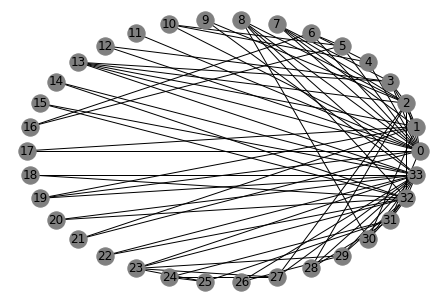

In [48]:
nx.draw_circular(kn, node_color='gray', with_labels=True)

In [49]:
wsn = nx.watts_strogatz_graph(24, 4, 0.3)

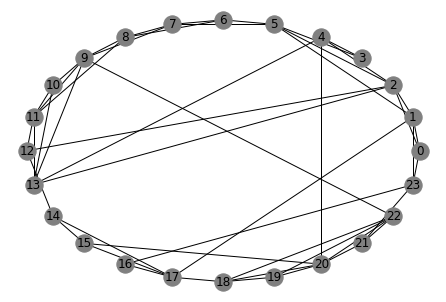

In [50]:
nx.draw_circular(wsn, node_color='gray', with_labels=True)

Za dalje istraživanje biblioteke možete pogledati [zvaničnu dokumentaciju](https://networkx.org/documentation/stable/tutorial.html).